## Import packages

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload

In [2]:
import pandas as pd # dataframe and analytics
import numpy as np # math 
import matplotlib.pyplot as plt # ploting
import seaborn as sns # bases on matplotlib for ploting

## Load the data

In [3]:
data_train = pd.read_csv('D:/AMOGH/train.csv/train.csv',header = 'infer')
data_train = data_train.sample(30000)


In [4]:
data_sample = data_train.to_csv('D:/projects information and files/sample.csv')

In [55]:
#data_test = pd.read_csv('D:/AMOGH/train.csv/test.csv',header = 'infer')

In [5]:
pd.set_option('display.max_colwidth', -1)

In [51]:
data_train.head(30)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the tools well. · talk """,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,"Your vandalism to the Matt Shirvington article has been reverted. Please don't do it again, or you will be banned.",0,0,0,0,0,0
8,00037261f536c51d,"Sorry if the word 'nonsense' was offensive to you. Anyway, I'm not intending to write anything in the article(wow they would jump on me for vandalism), I'm merely requesting that it be more encyclopedic so one can use it for school as a reference. I have been to the selective breeding page but it's almost a stub. It points to 'animal breeding' which is a short messy article that gives you no info. There must be someone around with expertise in eugenics? 93.161.107.169",0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contrary to those of DuLithgow,0,0,0,0,0,0


In [75]:
data_train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

## Missing values

In [77]:
data_train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [14]:
data_columns =['severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']

In [6]:
data_train['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

## Statistical analysis

In [61]:
data_train.shape

(159571, 8)

In [53]:
data_train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Individual analysis

In [56]:
data_train['toxic'].value_counts()

0    144277
1    15294 
Name: toxic, dtype: int64

In [57]:
data_train['severe_toxic'].value_counts()

0    157976
1    1595  
Name: severe_toxic, dtype: int64

In [58]:
data_train['threat'].value_counts()

0    159093
1    478   
Name: threat, dtype: int64

In [59]:
data_train['insult'].value_counts()

0    151694
1    7877  
Name: insult, dtype: int64

In [60]:
data_train['identity_hate'].value_counts()

0    158166
1    1405  
Name: identity_hate, dtype: int64

## EDA

In [13]:
data_bar 

,index,0
0,toxic,2871
1,severe_toxic,288
2,obscene,1555
3,threat,96
4,insult,1505
5,identity_hate,266


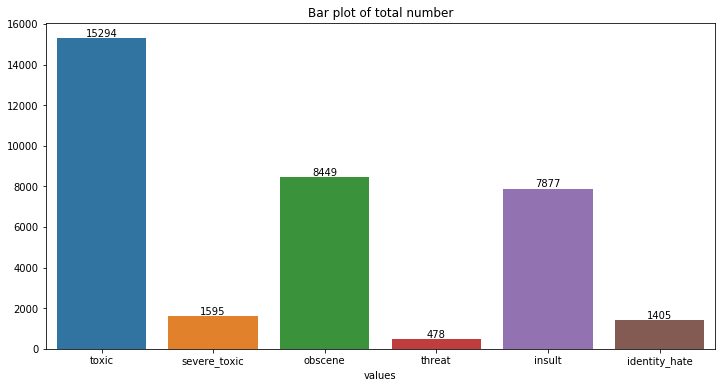

In [32]:
x = data_train.iloc[:,2:].sum()

#data_bar = data_train['{}'.format(x)].value_counts()
#data_bar = x.reset_index()
plt.figure(figsize=(12,6))
ax= sns.barplot(x.index,x.values)
plt.title('Bar plot of total number')
plt.xlabel("values")

    #adding the text labels
rects = ax.patches
labels =x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    
plt.show()    

In [24]:
#x = np.sum(data_train.iloc[:,2:])

### Combined

In [137]:
data_train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [33]:
data_combined_all = data_train[(data_train['insult'] >0 ) & (data_train['toxic'] >0) & (data_train['severe_toxic'] >0) & (data_train['obscene'] >0) &
                               
                               (data_train['threat'] >0 ) & (data_train['identity_hate'] >0 )]

In [51]:
data_len_1

159571

In [44]:
data_combined = pd.DataFrame({'data_combined_0' :[data_len_0],'data_1' : [data_len_1]
                             ,'data_2':[data_len_2],'data_3':[data_len_3],'data_4':[data_len_4],'data_5':[data_len_5],
                             'data_6':[data_len_6]})

In [21]:
data_combined_len = len(data_combined_all)

In [22]:
data_insults_severeinsults = data_train[(data_train['insult'] >0 ) & (data_train['severe_toxic'] >0) ]

In [23]:
data_insults_severe_len = len(data_insults_severeinsults)

In [24]:
data_thread_identityhate = data_train[(data_train['threat'] >0 ) & (data_train['identity_hate'] >0 )]
data_thread_iden_len = len(data_thread_identityhate)

In [25]:
data_obscene_toxic =  data_train[ (data_train['toxic'] >0) & (data_train['obscene'] >0)]
data_obscene_toxic_len = len(data_obscene_toxic)

In [31]:
data_obscene_insult =  data_train[ (data_train['insult'] >0) & (data_train['obscene'] >0)]
data_obscene_insult_len = len(data_obscene_insult)

In [32]:
data_combined = pd.DataFrame({'data_combined_all' :[data_combined_len],'data_insults_severe' : [data_insults_severe_len]
                             ,'data_thread_hate':[data_thread_iden_len],'data_obscene_toxic':[data_obscene_toxic_len],'data_obscene_insult':data_obscene_insult_len})

In [34]:
transposed = data_combined.transpose()
transposed.reset_index(inplace=True)

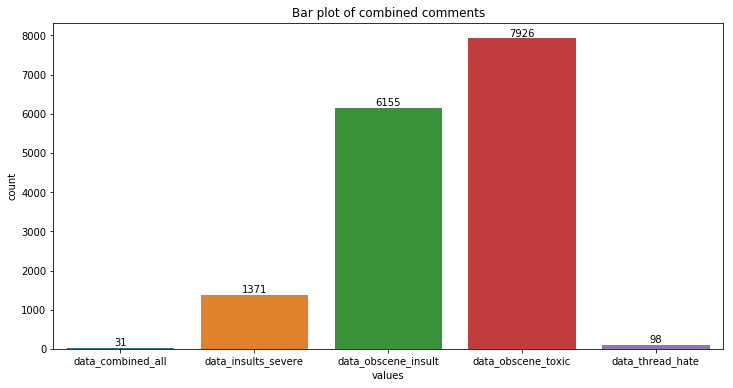

In [35]:
plt.figure(figsize=(12,6))
ax= sns.barplot('index',0,data=transposed)
plt.title('Bar plot of combined comments')
plt.xlabel("values")
plt.ylabel("count")

    #adding the text labels
rects = ax.patches
labels = transposed[0].values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

### Correlation plot

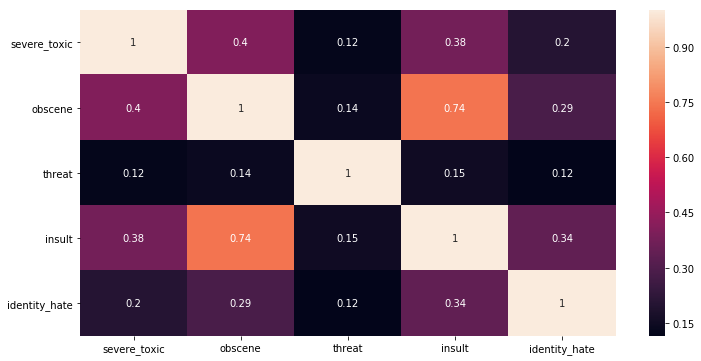

In [11]:
plt.figure(figsize=(12,6))
corr = data_train[data_columns].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True)

### Cross tab

#### Used to find the relation between two variables



In [ ]:
data_t = data_train.iloc[:,2:]

In [16]:
main_col = 'toxic'
corr_mats = []
for i in data_t.columns[1:]:
    confusion_matrix = pd.crosstab(data_t[main_col],data_t[i])
    corr_mats.append(confusion_matrix)
        

In [18]:
out = pd.concat(corr_mats,axis = 1,keys=data_t[1:])

In [23]:
out

toxic       severe_toxic       obscene       threat        \
severe_toxic       0     1            0     1       0    1       0     1   
toxic                                                                      
0             144277  0     143754       523   144248  29   143744  533    
1             13699   1595  7368         7926  14845   449  7950    7344   

              insult        
severe_toxic       0     1  
toxic                       
0             144174  103   
1             13992   1302

In [4]:
#### word count

In [22]:
data_words = data_train['comment_text'].apply(lambda x: len(str(x).split()))


In [18]:
count_unique_word =data_train["comment_text"].apply(lambda x: len(set(str(x).split())))

In [19]:
count_letters = data_train['comment_text'].apply(lambda x : len(str(x)))

In [25]:
import string

In [30]:
count_puctuations = data_train['comment_text'].apply(lambda x:len([c for c in str(x) if c in string.punctuation]))

In [33]:
count_sentence = data_train['comment_text'].apply(lambda x: len(re.findall("\n",str(x)))+1)

In [50]:
import matplotlib.gridspec as gridspec 

Text(0.5,1,'count_unique words')

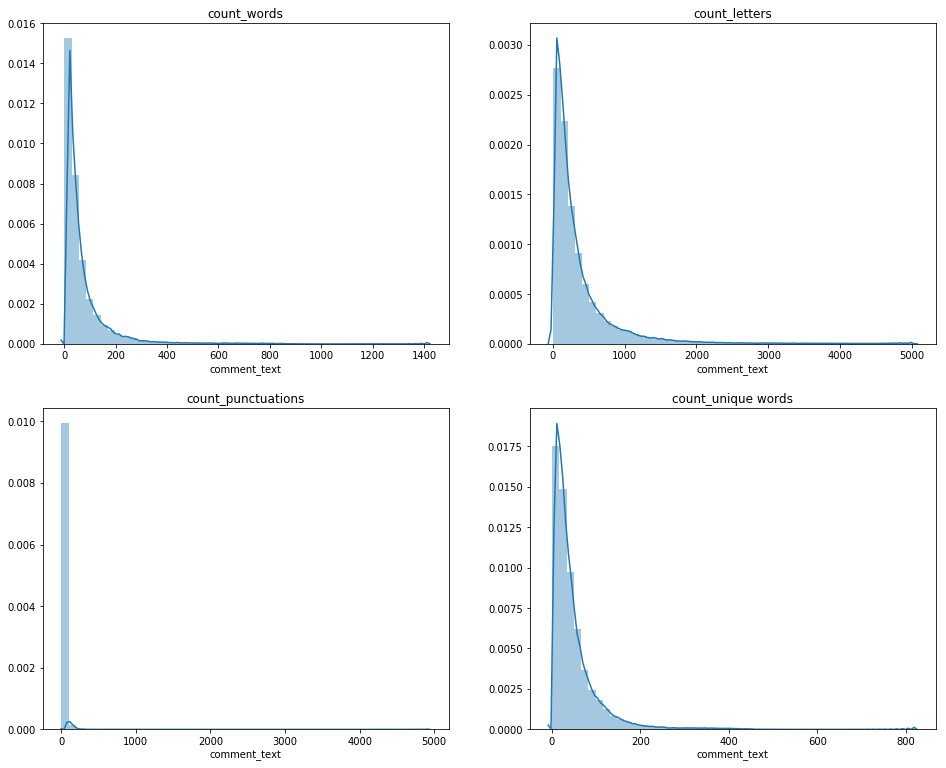

In [53]:
plt.figure(figsize=(16,13))

plt.subplot(221)
plt.title('count_words')
sns.distplot(data_words)

plt.subplot(222)
sns.distplot(count_letters)
plt.title('count_letters')


plt.subplot(223)
sns.distplot(count_puctuations)
plt.title('count_punctuations')

plt.subplot(224)
sns.distplot(count_unique_word)
plt.title('count_unique words')

## Text visualization 

In [5]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
Stopwords = set(stopwords.words('english'))

In [8]:
# visulaization On the whole dataset

(-0.5, 2499.5, 1999.5, -0.5)

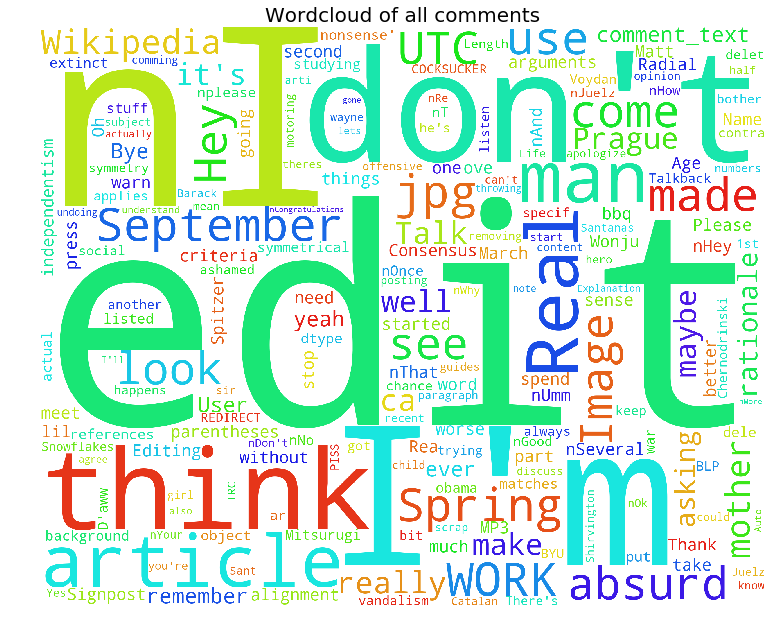

In [21]:
wordcloud = WordCloud(stopwords=Stopwords,
                      background_color='white',
                      width=2500,
                      height=2000).generate(str(data_train['comment_text']))
plt.figure(1,figsize=(13, 13))
plt.title('Wordcloud of all comments',fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
# TFIDF 

In [25]:
from PIL import Image
from os import path
img = np.array(Image.open("D:/img/14777953-danger-signs-and-toxic-death.jpg"))
#mask = np.array(img)


In [44]:
def train(name):
    
    text_name = nltk.Text(name)
    text_names = []
    for text in text_name:
        text_ = []
        text = text.lower()
        T = re.sub('\n',' ',text)
        text_.append(T)
        for i in text_:
            d = re.findall(r'[a-z0-9]+',i)
            text_names.append(' '.join(d))
            
            
            
            
    word_tokenize = []
    full_word_sent =[]
    from nltk import wordpunct_tokenize
    for sentence in text_names:
        words =[]
        for word in wordpunct_tokenize(sentence):
            word_tokenize.append(word)
            words.append(word)
        full_word_sent.append(words)
            
            
    tags =[]
    for pos in full_word_sent:
        tp =[]
        for word in pos:
            tp.append(lemmentizer.lemmatize(word))
        tags.append(tp)
       
 
        
    return tags

In [49]:
import nltk
import re
data_toxic = data_train[data_train['toxic'] > 0]

words = train(data_toxic['comment_text'])



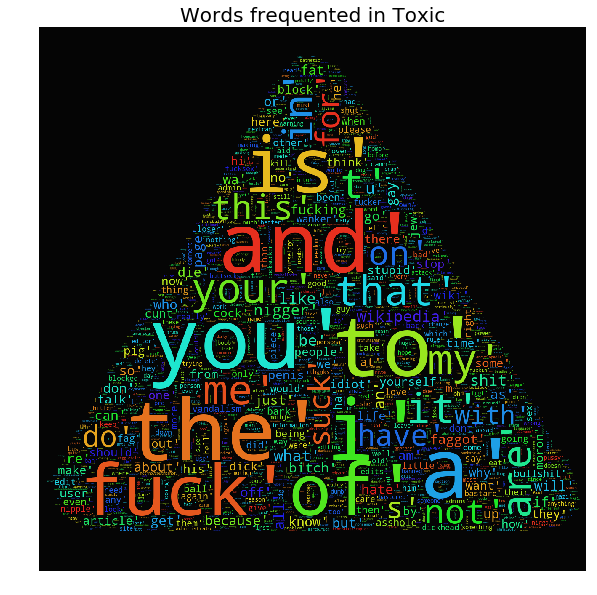

In [30]:
wc= WordCloud(background_color="black",max_words=2000,mask=img)
wc.generate(str(words))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Toxic", fontsize=20)
plt.imshow(wc, alpha=0.98)
plt.show()



In [4]:
import nltk

## Text analysis

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re

In [46]:
from nltk.corpus import stopwords
Stopwords = set(stopwords.words('english'))

In [47]:
from nltk import word_tokenize

In [48]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmentizer = WordNetLemmatizer()

In [8]:
#data_train['word'] = word

In [9]:
def train(name):
    
    text_name = nltk.Text(name)
    text_names = []
    for text in text_name:
        text_ = []
        text = text.lower()
        T = re.sub('\n',' ',text)
        text_.append(T)
        for i in text_:
            d = re.findall(r'[a-z0-9]+',i)
            text_names.append(' '.join(d))
            
            
            
            
    word_tokenize = []
    full_word_sent =[]
    from nltk import wordpunct_tokenize
    for sentence in text_names:
        words =[]
        for word in wordpunct_tokenize(sentence):
            word_tokenize.append(word)
            words.append(word)
        full_word_sent.append(words)
            
            
    tags =[]
    for pos in full_word_sent:
        tp =[]
        for word in pos:
            tp.append(lemmentizer.lemmatize(word))
        tags.append(tp)
       
 
        
    return tags

In [15]:
word = train(data_train['comment_text'])

In [16]:
data_train['word'] = word

In [17]:
data_train['word'] = data_train['word'].apply(' '.join)

## TFIDF

In [18]:
train_words = TfidfVectorizer(ngram_range=(1, 1),analyzer='word',strip_accents='unicode',lowercase=None,
                              stop_words=Stopwords,max_features=15000,sublinear_tf=True)
    

In [19]:
#total_comments = pd.concat([data_train['comment_text'],data_test['comment_text']])

In [20]:
train_words.fit(data_train['word'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=None, max_df=1.0, max_features=15000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words={'doing', 'themselves', 'all', 'hasn', 'because', 'about', 'weren', 'ourselves', 'only', 'out', 'herself', 'aren', 'y', 'this', 'by', 'after', 'hadn', 'll', 'their', 'just', 'why', 'before', 'while', 'then', 've', 'be', 'down', 'at', 'can', 'had', 'did', 'through', 'o', 'under', 'our', 'i...uldn', 's', 'was', 'than', 'until', 'off', 'few', 'very', 'me', 'been', 'too', 'the', 'now', 'wasn'},
        strip_accents='unicode', sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [21]:
tfidf_words = pd.DataFrame(train_words.transform(data_train['word']).todense(),columns=train_words.get_feature_names())

## Modeling

from the aritcle from analytics vidaya 
https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/

I got to know that there are three methods to solve multi label classification

1.Problem transformation
2.Adapthed algorithm
3.ensembled approach


### Binary relevance

Treats each label as separate class

### logistic regression

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(tfidf_words,data_train[data_columns],train_size = 0.8,test_size = 0.2)

In [23]:
from skmultilearn.problem_transform import BinaryRelevance

from sklearn.linear_model import LogisticRegression

classifier = BinaryRelevance(LogisticRegression())

classifier.fit(X_train, Y_train)

# predict
predictions = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

0.94616666666666671

In [24]:
from sklearn.metrics import roc_auc_score
pred = classifier.predict_proba(X_test)

In [25]:
pred = pred.toarray()

In [26]:
roc_auc_score(Y_test,pred)

0.97424816546709325

### Using naive bayes for binary classifcation

In [27]:
from skmultilearn.problem_transform import BinaryRelevance

from sklearn.naive_bayes import MultinomialNB

classifier = BinaryRelevance(MultinomialNB(alpha = 0.05))

classifier.fit(X_train, Y_train)

# predict

from sklearn.metrics import roc_auc_score
pred = classifier.predict_proba(X_test)
pred = pred.toarray()
roc_auc_score(Y_test,pred)

0.94302866267512608

### Chain classifer Logistic reg

first classifier is trained just on the input data and then next classifier on the input space  and then all in a chain

In [28]:
from skmultilearn.problem_transform import ClassifierChain

from sklearn.linear_model import LogisticRegression

classifier = ClassifierChain(LogisticRegression(C = 0.5))

classifier.fit(X_train, Y_train)

# predict
from sklearn.metrics import roc_auc_score
pred = classifier.predict_proba(X_test)
pred = pred.toarray()
roc_auc_score(Y_test,pred)

0.95882328411600481

### Using naive bayes for chain classification


In [23]:
from skmultilearn.problem_transform import ClassifierChain

from sklearn.naive_bayes import MultinomialNB

classifier = ClassifierChain(MultinomialNB(alpha = 0.05))

classifier.fit(X_train, Y_train)

# predict

from sklearn.metrics import roc_auc_score
pred = classifier.predict_proba(X_test)
pred = pred.toarray()
roc_auc_score(Y_test,pred)

0.94803078115972106

### Label powerset

In [24]:
from skmultilearn.problem_transform import LabelPowerset

from sklearn.linear_model import LogisticRegression

classifier = LabelPowerset(LogisticRegression())

classifier.fit(X_train, Y_train)

# predict
from sklearn.metrics import roc_auc_score
pred = classifier.predict_proba(X_test)
pred = pred.toarray()
roc_auc_score(Y_test,pred)

0.97269992711792774

### Ensemble method

In [25]:
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.problem_transform import BinaryRelevance

# construct base forest classifier
base_classifier = RandomForestClassifier(n_estimators=300)

# setup problem transformation approach with sparse matrices for random forest
classifier = LabelPowerset(classifier=base_classifier,
    require_dense=[False, False])

classifier.fit(X_train, Y_train)

# predict
from sklearn.metrics import roc_auc_score
pred = classifier.predict_proba(X_test)
pred = pred.toarray()
roc_auc_score(Y_test,pred)

0.9651907275737448

In [26]:
classifier

LabelPowerset(classifier=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       require_dense=[False, False])